two-level L96 model

each of the N slow variables is coupled to M fast variables, 

so in total the model is N + M*N dimensional

parameter values directly from Lorenz96 paper 

In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra
using StatsBase

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [2]:
A = rand(10,20)

10×20 Array{Float64,2}:
 0.70904    0.695478   0.0336649  …  0.177416    0.235665   0.165309
 0.0573716  0.95514    0.133867      0.465896    0.0193461  0.360936
 0.199837   0.785097   0.180435      0.0678533   0.917932   0.691133
 0.745286   0.246225   0.460734      0.382001    0.64549    0.144405
 0.212582   0.0168126  0.708893      0.195441    0.272507   0.700549
 0.323744   0.848176   0.531304   …  0.508116    0.653544   0.310263
 0.842916   0.811809   0.761573      0.00352619  0.769559   0.995107
 0.0741227  0.380255   0.359898      0.0249039   0.441939   0.0411475
 0.836024   0.506144   0.239482      0.462249    0.796434   0.69275
 0.365053   0.660847   0.663684      0.506613    0.702936   0.961156

In [3]:
sum(A,dims=2)

10×1 Array{Float64,2}:
  6.98449021620678
  8.955359405589512
  8.769785246857419
  9.988256074330206
 11.076982891978727
  8.778055909796546
 12.71489513928691
  8.975553868927785
  9.440574805929536
  9.479355640800044

In [4]:
const N = 10
const M = 10

10

In [5]:
function twolevel_l96!(du,u,p,t)
    F,h,c,b = p 
    X = @view u[:,1]
    Y = @view u[:,2:end] 
    hcb = h*c/b
    
    # boundary conditions solved by circular shift
    du[:,1] .= (-1 .*(circshift(X,-1) .- circshift(X,2)).*circshift(X,1) .- X .+ F .- hcb*sum(Y,dims=2))[:]
    
    # boundary conditions are complicaded for the fast variable....
    du[1,2] = -c*b*(Y[1,2] - Y[N,M-1])*Y[N,M] - c*Y[1,1] + hcb*X[1]
    du[1,3] = -c*b*(Y[1,3] - Y[N,M])*Y[1,1] - c*Y[1,2] + hcb*X[1]
    for j=3:M-1
        du[1,j+1] = -c*b*(Y[1,j+1] - Y[1,j-2])*Y[1,j-1] - c*Y[1,j] + hcb*X[1]
    end 
    du[1,M+1] = -c*b*(Y[2,1] - Y[1,M-2])*Y[1,M-1] - c*Y[1,M] + hcb*X[1]
    
    for i=2:N-1    
        du[i,2] = -c*b*(Y[i,2] - Y[i-1,M-1])*Y[i-1,M] - c*Y[i,1] + hcb*X[i]
        du[i,3] = -c*b*(Y[i,3] - Y[i-1,M])*Y[i,1] - c*Y[i,2] + hcb*X[i]
        for j=3:M-1
            du[i,j+1] = -c*b*(Y[i,j+1] - Y[i,j-2])*Y[i,j-1] - c*Y[i,j] + hcb*X[i]
        end 
        du[i,M+1] = -c*b*(Y[i+1,1] - Y[i,M-2])*Y[i,M-1] - c*Y[i,M] + hcb*X[i]
    end
    
    du[N,2] = -c*b*(Y[N,2] - Y[N-1,M-1])*Y[N-1,M] - c*Y[N,1] + hcb*X[N]
    du[N,3] = -c*b*(Y[N,3] - Y[N-1,M])*Y[N,1] - c*Y[N,2] + hcb*X[N]
    for j=3:M-1
        du[N,j+1] = -c*b*(Y[N,j+1] - Y[N,j-2])*Y[N,j-1] - c*Y[N,j] + hcb*X[N]
    end 
    du[N,M+1] = -c*b*(Y[1,1] - Y[N,M-2])*Y[N,M-1] - c*Y[N,M] + hcb*X[N]
    
end

    


twolevel_l96! (generic function with 1 method)

In [6]:
F = 10. # forcing, 10 -> chaotic 
h = 1. # coupling 
c = 10. # time scale separation
b = 10. # amplitude scale seperation 

pars = [F,h,c,b]
u0 = rand(N,M+1)

prob = ODEProblem(twolevel_l96!, u0, (0.,500.), pars)

ODEProblem with uType Array{Float64,2} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: [0.6287940173092321 0.4976677823441189 … 0.323338641256943 0.5416298379119726; 0.5114863380185313 0.9549558459532612 … 0.30638448005208585 0.3769293435773724; … ; 0.3218660408037428 0.41483719101907 … 0.2076449243197831 0.9122497494086725; 0.3632043501784552 0.29829803131595733 … 0.8538064045354523 0.45521784476709337]

In [7]:
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 27886-element Array{Float64,1}:
   0.0
   0.004544029879021899
   0.008152526876929557
   0.01281651847695009
   0.017676207085399315
   0.022800612471027937
   0.02821445380002511
   0.033853664740061476
   0.040034441792273785
   0.04621687030423035
   0.0530817207114073
   0.05906595636297352
   0.06606155957203184
   ⋮
 499.7368827438929
 499.76349753077767
 499.78634047149615
 499.8143450003483
 499.83792354248783
 499.86447847006644
 499.88843375795585
 499.9138112700858
 499.9397260590896
 499.96499319360635
 499.9905118002733
 500.0
u: 27886-element Array{Array{Float64,2},1}:
 [0.6287940173092321 0.4976677823441189 … 0.323338641256943 0.5416298379119726; 0.5114863380185313 0.9549558459532612 … 0.30638448005208585 0.3769293435773724; … ; 0.3218660408037428 0.41483719101907 … 0.2076449243197831 0.9122497494086725; 0.3632043501784552 0.29829803131595733 … 0.8538064045354523 0.45521784476709337]
 [0.65074603

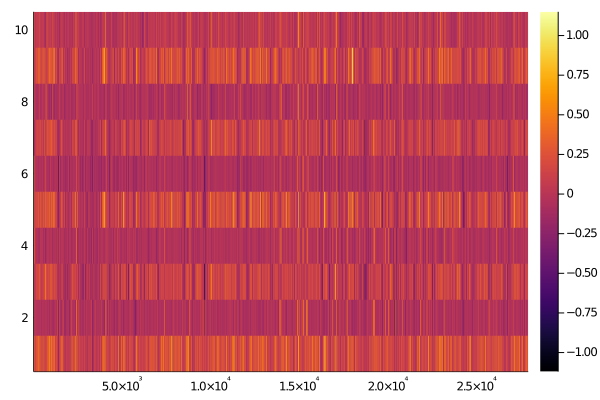

In [8]:
soli = Array(sol);

heatmap(soli[1,2:end,:])

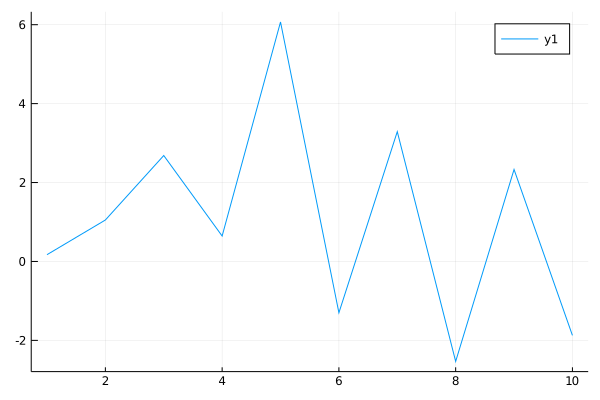

In [9]:
plot(soli[:,1,8000])